Welcome to the Proven Club challenge! Develop a predictive model that analyzes online news articles to forecast their popularity, leveraging NLP and LLM techniques. Additionally, conduct a correlation study to identify the features most strongly associated with high levels of engagement.

### **Dataset:**

- Kindly explore the **[dataset](https://drive.google.com/file/d/1m-GaIPsvZm6tuInaeEzDmZIIDfoabuKj/view?usp=sharing)** to understand the features and target variable (e.g., the number of shares). The explanation of the particulars can be seen below:
    
    [Dataset columns’ explained](https://www.notion.so/Dataset-columns-explained-d6a1b09fcac94027a1129c17d4333fb5?pvs=21)
    
- Preprocess the data, handling missing values, and perform any necessary data cleaning.

1. url: URL of the article.(String)
2. timedelta: Days between the article publication and the dataset acquisition.(float)
3. n_tokens_title: Number of words in the title (Integer)
4. n_tokens_content: Number of words in the content((Integer)
5. n_unique_tokens: Rate of unique words in the content (Integer)
6. n_non_stop_words: Rate of non-stop words in the content (Integer)
7. n_non_stop_unique_tokens: Rate of unique non-stop words in the content(Integer)
8. num_hrefs: Number of links (Integer)
9. num_self_hrefs: Number of links to other articles published by Mashable (Integer)
10. num_imgs: Number of images (float)
11. num_videos: Number of videos (float)
12. average_token_length: Average length of the words in the content (float)
13. num_keywords: Number of keywords in the metadata (float)
14. data_channel_is_lifestyle: Is data channel 'Lifestyle'? (Binary)
15. data_channel_is_entertainment: Is data channel 'Entertainment'? (Binary)
16. data_channel_is_bus: Is data channel 'Business'? (Binary)
17. data_channel_is_socmed: Is data channel 'Social Media'? (Binary)
18. data_channel_is_tech: Is data channel 'Tech'? (Binary)
19. data_channel_is_world: Is data channel 'World'? (Binary)
20. kw_min_min: Worst keyword (min. shares) (float)
21. kw_max_min: Worst keyword (max. shares) (float)
22. kw_avg_min: Worst keyword (avg. shares) (float)
23. kw_min_max: Best keyword (min. shares) (float)
24. kw_max_max: Best keyword (max. shares) (float)
25. kw_avg_max: Best keyword (avg. shares) (float)
26. kw_min_avg: Avg. keyword (min. shares) (float)
27. kw_max_avg: Avg. keyword (max. shares) (float)
28. kw_avg_avg: Avg. keyword (avg. shares) (float)
29. self_reference_min_shares: Min. shares of referenced articles in Mashable (float)
30. self_reference_max_shares: Max. shares of referenced articles in Mashable (float)
31. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable (float)
32. weekday_is_monday: Was the article published on a Monday? (Binary)
33. weekday_is_tuesday: Was the article published on a Tuesday? (Binary)
34. weekday_is_wednesday: Was the article published on a Wednesday? (Binary)
35. weekday_is_thursday: Was the article published on a Thursday? (Binary)
36. weekday_is_friday: Was the article published on a Friday? (Binary)
37. weekday_is_saturday: Was the article published on a Saturday? (Binary)
38. weekday_is_sunday: Was the article published on a Sunday? (Binary)
39. is_weekend: Was the article published on the weekend? (Binary)
40. LDA_00: Closeness to LDA topic 0 (float)
41. LDA_01: Closeness to LDA topic 1 (float)
42. LDA_02: Closeness to LDA topic 2 (float)
43. LDA_03: Closeness to LDA topic 3 (float)
44. LDA_04: Closeness to LDA topic 4 (float)
45. global_subjectivity: Text subjectivity (float)
46. global_sentiment_polarity: Text sentiment polarity (float)
47. global_rate_positive_words: Rate of positive words in the content (float)
48. global_rate_negative_words: Rate of negative words in the content (float)
49. rate_positive_words: Rate of positive words among non-neutral tokens (float)
50. rate_negative_words: Rate of negative words among non-neutral tokens (float)
51. avg_positive_polarity: Avg. polarity of positive words (float)
52. min_positive_polarity: Min. polarity of positive words (float)
53. max_positive_polarity: Max. polarity of positive words (float)
54. avg_negative_polarity: Avg. polarity of negative words (float)
55. min_negative_polarity: Min. polarity of negative words (float)
56. max_negative_polarity: Max. polarity of negative words (float)
57. title_subjectivity: Title subjectivity (float)
58. title_sentiment_polarity: Title polarity (float)
59. abs_title_subjectivity: Absolute subjectivity level (float)
60. abs_title_sentiment_polarity: Absolute polarity level (float)
61. shares: Number of shares (target) (Integer)

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv("./data/OnlineNewsPopularity.csv")

In [61]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [62]:
new_cols = [x.strip() for x in df.columns]
df.columns = new_cols

In [90]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 39644 rows and 61 columns


In [91]:
df.describe(include='all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
unique,39644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2013/01/07/amazon-instant-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,NaN,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,NaN,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,NaN,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,NaN,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,NaN,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000


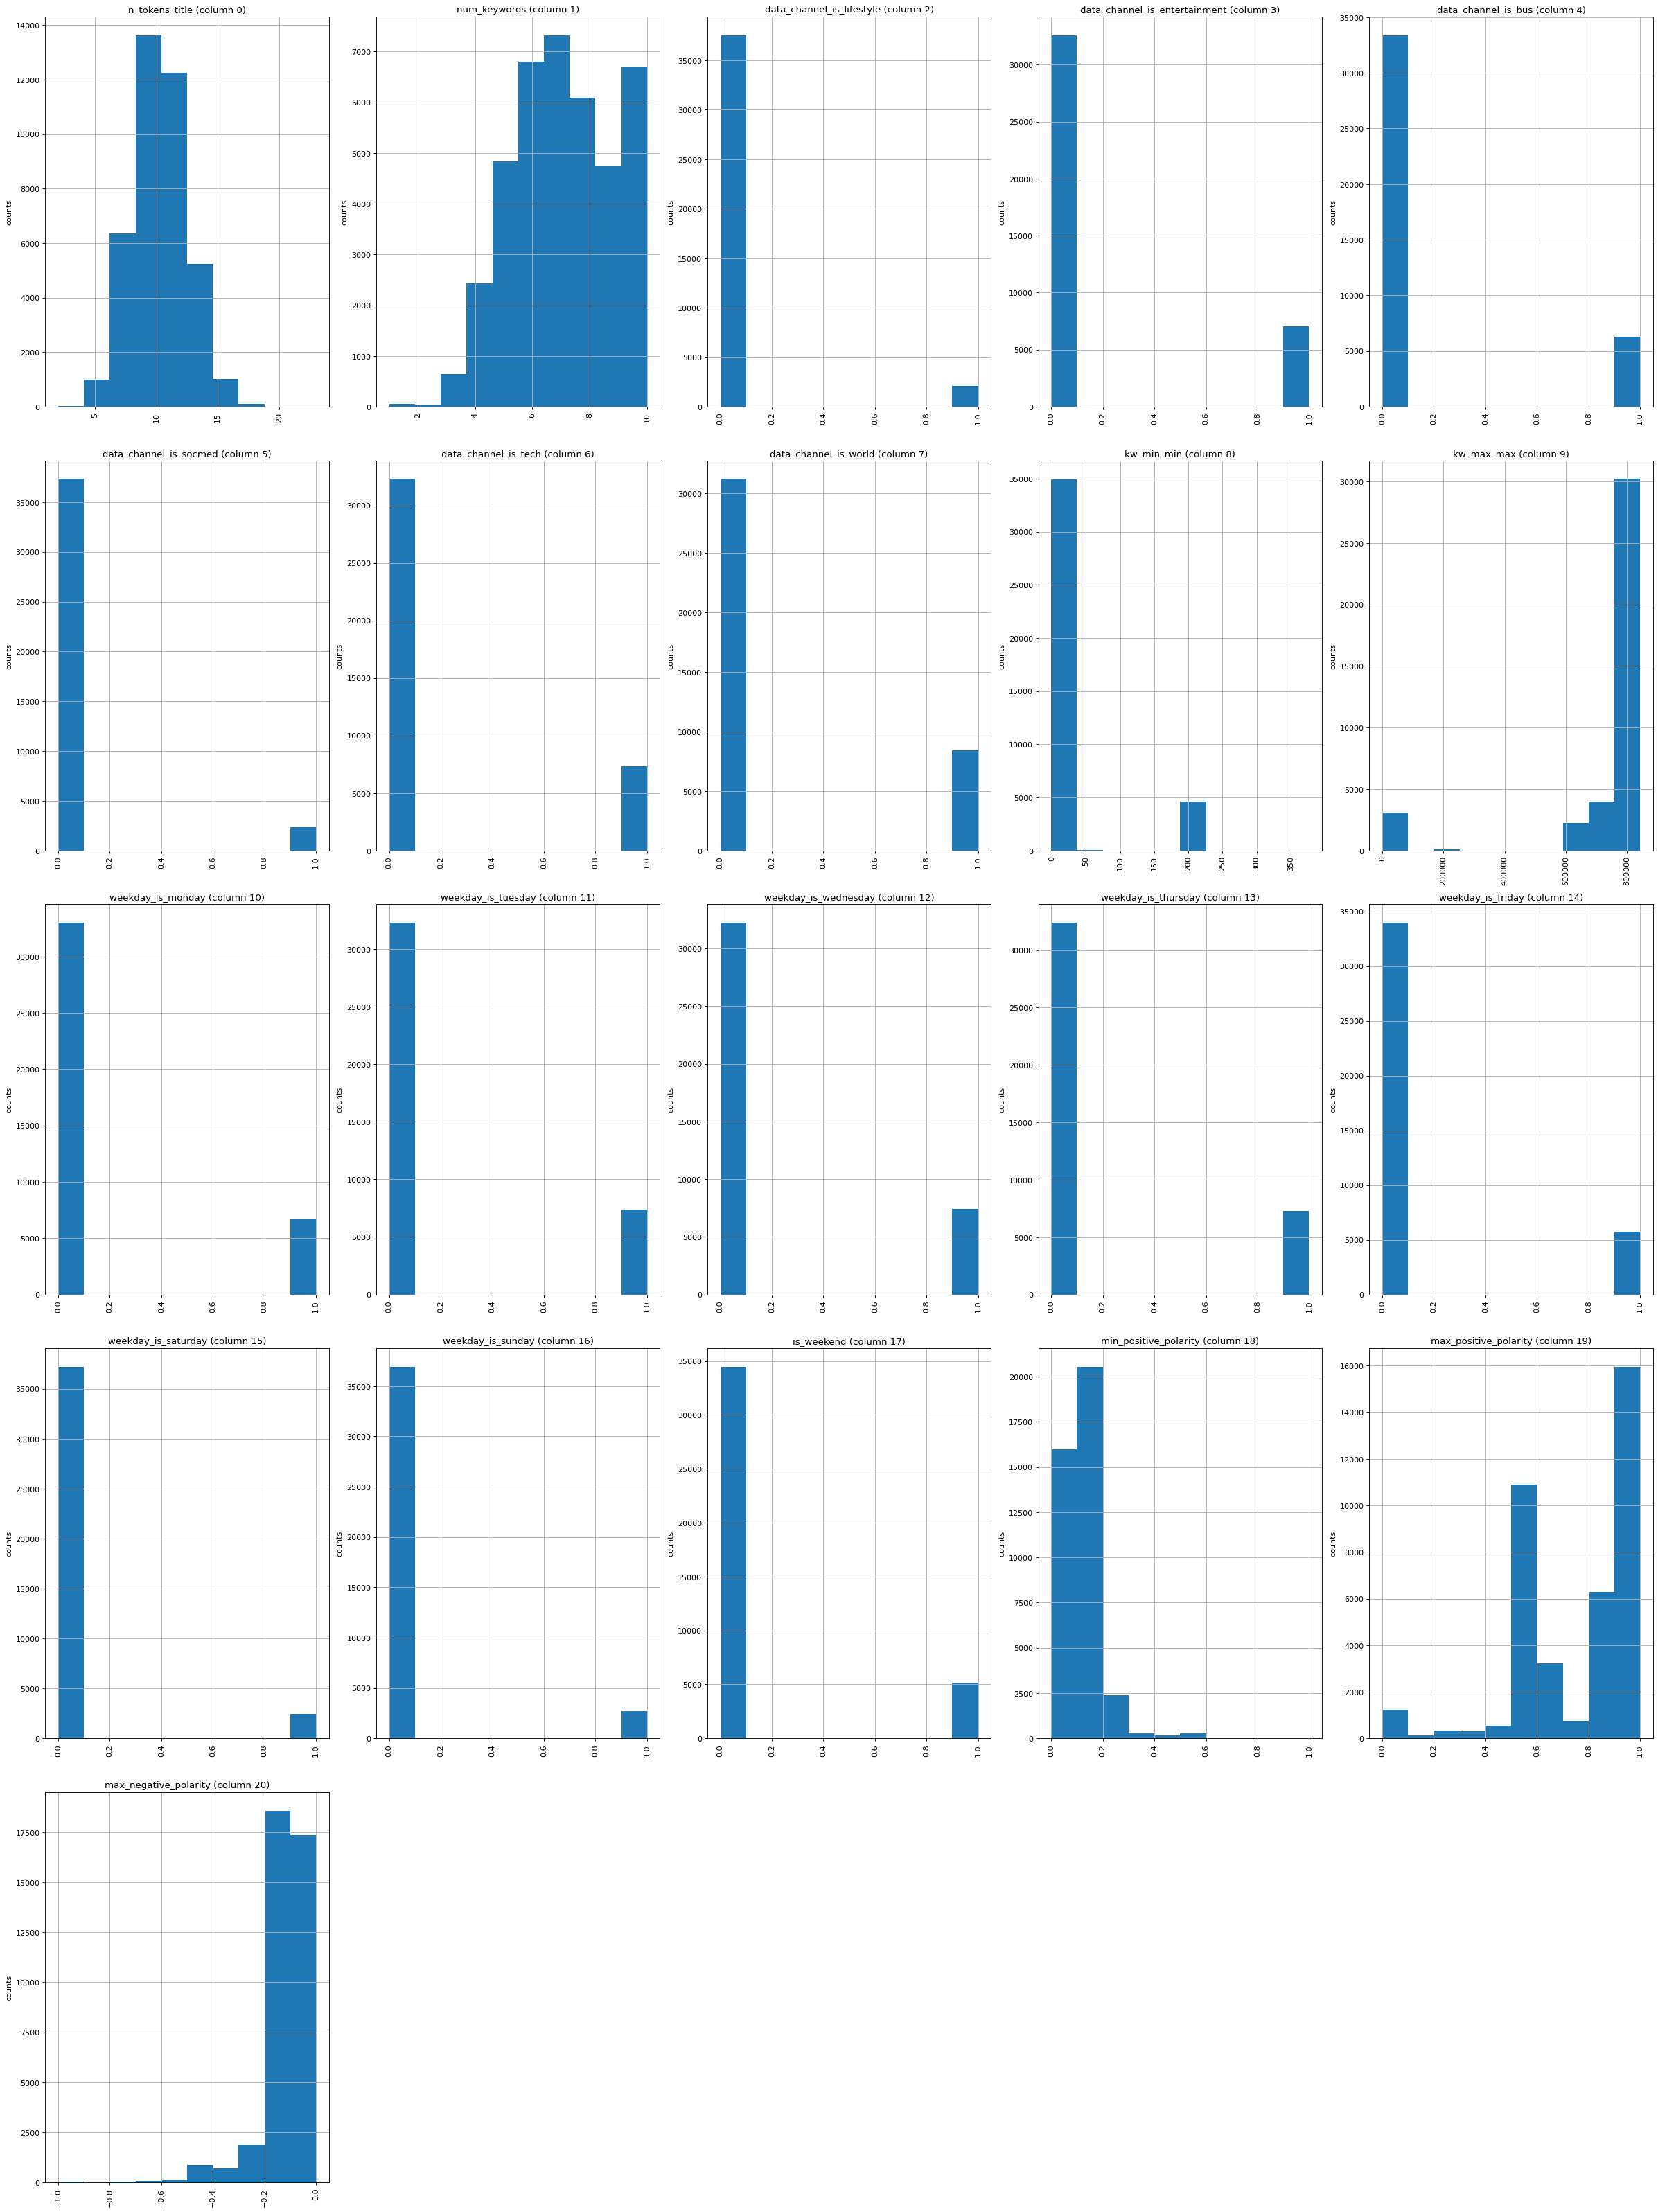

In [109]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 61, 5)

### Identify missing values

In [63]:
for x in range(0,len(df.columns),5):
    print(x)
    print(df.iloc[:,x:x+5].isna().sum())


0
url                 0
timedelta           0
n_tokens_title      0
n_tokens_content    0
n_unique_tokens     0
dtype: int64
5
n_non_stop_words            0
n_non_stop_unique_tokens    0
num_hrefs                   0
num_self_hrefs              0
num_imgs                    0
dtype: int64
10
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
dtype: int64
15
data_channel_is_bus       0
data_channel_is_socmed    0
data_channel_is_tech      0
data_channel_is_world     0
kw_min_min                0
dtype: int64
20
kw_max_min    0
kw_avg_min    0
kw_min_max    0
kw_max_max    0
kw_avg_max    0
dtype: int64
25
kw_min_avg                   0
kw_max_avg                   0
kw_avg_avg                   0
self_reference_min_shares    0
self_reference_max_shares    0
dtype: int64
30
self_reference_avg_sharess    0
weekday_is_monday             0
weekday_is_tuesday           

No missing values found

### Grouping of columns

In [64]:
words_analysis_cols = df.columns[2:13]
channel_analysis_cols = df.columns[13:19]
keyword_analysis_cols = df.columns[19:28]
share_analysis_cols = df.columns[28:31]
day_analysis_cols = df.columns[31:39]
lda_analysis_cols = df.columns[39:44]
sent_analysis_cols = df.columns[44:60]
target_col = df.columns[60]


### Column Analysis

In [65]:
df['url'][0]

'http://mashable.com/2013/01/07/amazon-instant-video-browser/'

URL Column has publish date and article title
URL links are not true and no text data can be fetched from this link

In [97]:
df["timedelta"].describe()

count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64

In [70]:
df1 = df[words_analysis_cols]
df1["shares"] =  df["shares"]

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/2409238994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]


In [71]:
df1.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,843300.000000


Can perform standardization for better optimisation

In [96]:
df1_corr = df1.corr()['shares'].sort_values()
df1_corr

average_token_length       -0.022007
num_self_hrefs             -0.001900
n_non_stop_unique_tokens    0.000114
n_non_stop_words            0.000443
n_unique_tokens             0.000806
n_tokens_content            0.002459
n_tokens_title              0.008783
num_keywords                0.021818
num_videos                  0.023936
num_imgs                    0.039388
num_hrefs                   0.045404
shares                      1.000000
Name: shares, dtype: float64

In [98]:
def analyse_column_groups(df, column_group):
    df1 = df[column_group]
    df1["shares"] =  df["shares"]
    print(df1.describe(include='all'))
    df1_corr = df1.corr()['shares'].sort_values()
    print(df1_corr)


In [99]:
analyse_column_groups(df,channel_analysis_cols)

       data_channel_is_lifestyle  data_channel_is_entertainment  \
count               39644.000000                   39644.000000   
mean                    0.052946                       0.178009   
std                     0.223929                       0.382525   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     0.000000                       0.000000   
max                     1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%             

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/1684296982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]


In [100]:
analyse_column_groups(df,keyword_analysis_cols)


         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.990877    620.783887   57986.029357   
min       -1.000000       0.000000     -1.000000       0.000000   
25%       -1.000000     445.000000    141.750000       0.000000   
50%       -1.000000     660.000000    235.500000    1400.000000   
75%        4.000000    1000.000000    357.000000    7900.000000   
max      377.000000  298400.000000  42827.857143  843300.000000   

          kw_max_max     kw_avg_max    kw_min_avg     kw_max_avg  \
count   39644.000000   39644.000000  39644.000000   39644.000000   
mean   752324.066694  259281.938083   1117.146610    5657.211151   
std    214502.129573  135102.247285   1137.456951    6098.871957   
min         0.000000       0.000000     -1.000000       0.000000   
25%    843300.000000  172846.875000      0.000000    356

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/1684296982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]


In [101]:
analyse_column_groups(df,share_analysis_cols)


       self_reference_min_shares  self_reference_max_shares  \
count               39644.000000               39644.000000   
mean                 3998.755396               10329.212662   
std                 19738.670516               41027.576613   
min                     0.000000                   0.000000   
25%                   639.000000                1100.000000   
50%                  1200.000000                2800.000000   
75%                  2600.000000                8000.000000   
max                843300.000000              843300.000000   

       self_reference_avg_sharess         shares  
count                39644.000000   39644.000000  
mean                  6401.697580    3395.380184  
std                  24211.332231   11626.950749  
min                      0.000000       1.000000  
25%                    981.187500     946.000000  
50%                   2200.000000    1400.000000  
75%                   5200.000000    2800.000000  
max                 8433

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/1684296982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]


In [102]:
analyse_column_groups(df,day_analysis_cols)


       weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
count       39644.000000        39644.000000          39644.000000   
mean            0.168020            0.186409              0.187544   
std             0.373889            0.389441              0.390353   
min             0.000000            0.000000              0.000000   
25%             0.000000            0.000000              0.000000   
50%             0.000000            0.000000              0.000000   
75%             0.000000            0.000000              0.000000   
max             1.000000            1.000000              1.000000   

       weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
count         39644.000000       39644.000000         39644.000000   
mean              0.183306           0.143805             0.061876   
std               0.386922           0.350896             0.240933   
min               0.000000           0.000000             0.000000   
25%               0

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/1684296982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]


In [103]:
analyse_column_groups(df,lda_analysis_cols)


             LDA_00        LDA_01        LDA_02        LDA_03        LDA_04  \
count  39644.000000  39644.000000  39644.000000  39644.000000  39644.000000   
mean       0.184599      0.141256      0.216321      0.223770      0.234029   
std        0.262975      0.219707      0.282145      0.295191      0.289183   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.025051      0.025012      0.028571      0.028571      0.028574   
50%        0.033387      0.033345      0.040004      0.040001      0.040727   
75%        0.240958      0.150831      0.334218      0.375763      0.399986   
max        0.926994      0.925947      0.919999      0.926534      0.927191   

              shares  
count   39644.000000  
mean     3395.380184  
std     11626.950749  
min         1.000000  
25%       946.000000  
50%      1400.000000  
75%      2800.000000  
max    843300.000000  
LDA_02   -0.059163
LDA_04   -0.016622
LDA_01   -0.010183
LDA_00   -0.003793
LDA_0

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/1684296982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]


In [104]:
analyse_column_groups(df,sent_analysis_cols)


       global_subjectivity  global_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.443370                   0.119309   
std               0.116685                   0.096931   
min               0.000000                  -0.393750   
25%               0.396167                   0.057757   
50%               0.453457                   0.119117   
75%               0.508333                   0.177832   
max               1.000000                   0.727841   

       global_rate_positive_words  global_rate_negative_words  \
count                39644.000000                39644.000000   
mean                     0.039625                    0.016612   
std                      0.017429                    0.010828   
min                      0.000000                    0.000000   
25%                      0.028384                    0.009615   
50%                      0.039023                    0.015337   
75%                      0.0502

/var/folders/0m/clrq8_6s3mzb_29j7gly37kr0000gn/T/ipykernel_17448/1684296982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["shares"] =  df["shares"]
